# Reading in file and converting timestamps

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import compress

from datetime import datetime
from dateutil.parser import parse

import math
import os
import copy

In [2]:
# Reading the text file
product_descriptions = pd.read_csv('product_rating_modified.txt', header = None, sep = '\', \'', engine = 'python')

In [3]:
product_descriptions.head()
product_descriptions[product_descriptions.iloc[:,3]=='Hollandfinest']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
9525,'10623,1,-1,Hollandfinest,#####,5.0,Enter your comments here,20181223064411,-1.0,0.001182,-1.0,-1,-1,124,421198.283113,TRY OFFER 10x 250MG AMG XTC 12 EURO
9526,'10624,1,-1,Hollandfinest,#####,5.0,How much pills will i receive? 60?,20181223064411,-1.0,0.001182,-1.0,-1,-1,124,421198.283113,TRY OFFER 10x 250MG AMG XTC 12 EURO
9527,'10625,1,-1,Hollandfinest,#####,5.0,7DD,20181220064411,-1.0,0.001182,-1.0,-1,-1,124,421198.283113,TRY OFFER 10x 250MG AMG XTC 12 EURO
9528,'10626,1,-1,Hollandfinest,#####,5.0,"Best vendor on dm, pills are 100%, delivery is...",19691231190000,-1.0,0.001182,-1.0,-1,-1,124,421198.283113,TRY OFFER 10x 250MG AMG XTC 12 EURO
9529,'10627,1,-1,Hollandfinest,#####,5.0,Fast and good package\nNon tested recommand,20181220064411,-1.0,0.001182,-1.0,-1,-1,124,421198.283113,TRY OFFER 10x 250MG AMG XTC 12 EURO
9530,'10628,1,-1,Hollandfinest,#####,5.0,"Fast delivery to UK, initial tests look okay!",20181220064411,-1.0,0.001182,-1.0,-1,-1,124,421198.283113,TRY OFFER 10x 250MG AMG XTC 12 EURO
9531,'10629,1,-1,Hollandfinest,#####,5.0,fe,20181220064411,-1.0,0.001182,-1.0,-1,-1,124,421198.283113,TRY OFFER 10x 250MG AMG XTC 12 EURO
9532,'10630,1,-1,Hollandfinest,#####,5.0,FE! I will update when i received the package.,20181224064411,-1.0,0.001182,-1.0,-1,-1,124,421198.283113,TRY OFFER 10x 250MG AMG XTC 12 EURO
9533,'10631,1,-1,Hollandfinest,#####,5.0,"Second time ordering from you guys, And once a...",20181126064411,-1.0,0.001182,-1.0,-1,-1,124,421198.283113,TRY OFFER 10x 250MG AMG XTC 12 EURO
9534,'10632,1,-1,Hollandfinest,#####,5.0,"arrived on 25th, best christmas gift ever :) 1...",20181214064411,-1.0,0.001182,-1.0,-1,-1,124,421198.283113,TRY OFFER 10x 250MG AMG XTC 12 EURO


In [4]:
product_descriptions.groupby(1).count()

,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,,,,,,,,,,,,,,,
1,92388,92388,92388,92388,92388,92388,92388,92388,92388,92388,92388,92388,92388,92388,92388
2,8902,8902,8902,8902,8902,8902,8902,8902,8902,8902,8902,8902,8902,8902,8902
3,9947,9947,9947,9947,9947,9947,9947,9947,9947,9947,9947,9947,9947,9947,9947
4,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718
5,6007,6007,6007,6007,6007,6007,6007,6007,6007,6007,6007,6007,6007,6007,6007
6,1442,1442,1442,1442,1442,1442,1442,1442,1442,1442,1442,1442,1442,1442,1442
10,530,530,530,530,530,530,530,530,530,530,530,530,530,530,530


In [4]:
# Only get transactions in Market 1
product_descriptions = product_descriptions[product_descriptions.iloc[:,1] == 1]

In [5]:
# Function to convert numeric time to datetime object
def parseDate(raw_date, pattern = '%Y%m%d%H%M%S'):
    string_date = str(raw_date)
    return(datetime.strptime(string_date, pattern))

# Parse the dates, and place in new column
product_descriptions['dates'] = product_descriptions.iloc[:,7].apply(parseDate)

# Tokenizing Product Description

In [6]:
import spacy
from spacy.lang.en import English
parser = English()

In [7]:
# Function to tokenize titles
def tokenize_1(title):
    tokens = parser(title.lower())
    tokens = [token.orth_ for token in tokens if not token.orth_.isspace()]
    return(tokens)

In [8]:
tokenize_1('25gr*MDMA')

['25gr*mdma']

In [9]:
# Apply tokenizer to the titles in the dataframe
product_descriptions['tokenized_titles'] = product_descriptions.iloc[:,15].apply(tokenize_1)

In [10]:
# Alternative tokenizer
special_char =['`','\'','=','-','~','!','@','#','$','^','&','*','(',')','_','+','[',']','{','}',';','\\',':','|','<','<','>','?','//']

def remove_special_char(string):
    for char in special_char:
        string = string.replace(char,' ')
    return(string)

def tokenize(string):
    return remove_special_char(string).split()

# Categorize drugs

In [11]:
import drugLookup

Get list of slang phrases that are multiple words

In [12]:
# Load drugs dictionary
drugs_dict = drugLookup.get_drugs_dict()

complete_multi_word_list = []

drug_index = 0
#For loop that gets all the synonyms of drugs with more than one word
for drug in drugs_dict.keys():
    slang_words = drugs_dict[drug]
    multi_word_list = []
    for slang_word in slang_words:
        if ' ' in slang_word:
            multi_word_list.append(slang_word)
    complete_multi_word_list.append(multi_word_list)

In [13]:
# Create multi_word dictionary
drug_cats = list(drugs_dict.keys())
multi_drug_dict = dict(zip(drug_cats, complete_multi_word_list))

In [14]:
# multi_drug_dict

In [15]:
# Load dictionary of drugs
drugs_dict = drugLookup.get_drugs_dict()


# Get list of possible drugs for each listing
def categorize_listing(title_set):
    #     Function takes in set of two: first entry is raw_title, second is tokenized_title
    possible_drugs = []
    list_title_set = list(title_set)
    raw_title = list_title_set[0]
    tokenized_title = list_title_set[1]
    for drug in drugs_dict.keys():
        if any(token in drugs_dict[drug] for token in tokenized_title):  # uses tokenization
            possible_drugs.append(drug)
            break
        if any(multi_word in raw_title.lower() for multi_word in multi_drug_dict[drug]):
            possible_drugs.append(drug)
            break
    return possible_drugs

In [16]:
# Categorize each listing
product_descriptions['drug_prediction'] = product_descriptions.iloc[:,[15,17]].apply(categorize_listing, axis = 1)

In [21]:
product_descriptions['drug_prediction']

9430               [heroin]
9431               [heroin]
9432            [not_drugs]
9433            [not_drugs]
9434      [benzodiazepines]
9435      [benzodiazepines]
9436      [benzodiazepines]
9437      [benzodiazepines]
9438      [benzodiazepines]
9439      [benzodiazepines]
9440      [benzodiazepines]
9441      [benzodiazepines]
9442      [benzodiazepines]
9443      [benzodiazepines]
9444      [benzodiazepines]
9445      [benzodiazepines]
9446      [benzodiazepines]
9447      [benzodiazepines]
9448      [benzodiazepines]
9449      [benzodiazepines]
9450      [benzodiazepines]
9451      [benzodiazepines]
9452      [benzodiazepines]
9453            [marijuana]
9454            [marijuana]
9455            [marijuana]
9456            [marijuana]
9457              [hashish]
9458              [hashish]
9459              [hashish]
                ...        
119854    [methamphetamine]
119855    [methamphetamine]
119856    [methamphetamine]
119857    [methamphetamine]
119858    [methamphe

# Remove bad dates

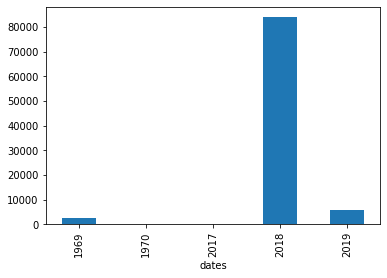

dates
1969     2457
1970        2
2017       25
2018    84014
2019     5890
Name: dates, dtype: int64

In [17]:
# Look at distribution of dates
product_descriptions['dates'].groupby(product_descriptions["dates"].dt.year).count().plot(kind='bar')
plt.show()
product_descriptions['dates'].groupby(product_descriptions["dates"].dt.year).count()

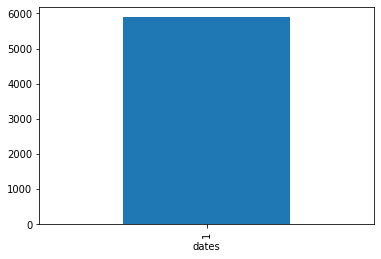

dates
1    5890
Name: dates, dtype: int64

In [18]:
# Plot the 2019 dates
after_2019 = product_descriptions['dates'] > datetime(2019,1,1)
after_2019_df = product_descriptions[after_2019]
after_2019_df['dates'].groupby(after_2019_df["dates"].dt.month).count().plot(kind='bar')
plt.show()

after_2019_df['dates'].groupby(after_2019_df["dates"].dt.month).count()

#after_2019

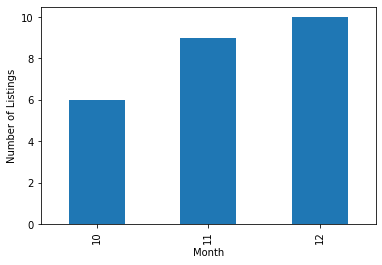

In [19]:
# Plot the 2017 dates
before_2018 = product_descriptions['dates'] < datetime(2018,1,1)
after_2016 = product_descriptions['dates'] > datetime(2016,12,31)
in_2017_df = product_descriptions[after_2016 & before_2018]
in_2017_df['dates'].groupby(in_2017_df["dates"].dt.month).count().plot(kind='bar')
plt.ylabel('Number of Listings')
plt.xlabel('Month')
plt.show()

In [20]:
# Filter out the 1969/1970/2019 dates
# good_dates = product_desci
before_2019 = product_descriptions['dates'] < datetime(2019,2,1)
after_2017 = product_descriptions['dates'] > datetime(2018,4,1)
df = product_descriptions[before_2019 & after_2017]

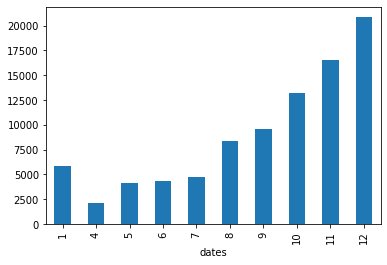

dates
1      5890
4      2103
5      4164
6      4316
7      4786
8      8382
9      9607
10    13225
11    16497
12    20872
Name: dates, dtype: int64


89842

In [21]:
# Plot 2018 dates
df['dates'].groupby(df["dates"].dt.month).count().plot(kind='bar')
plt.show()

monthly_listings = df['dates'].groupby(df["dates"].dt.month).count()
total_listings = sum(df['dates'].groupby(df["dates"].dt.month).count())

print(monthly_listings)
total_listings
#percentage_of_listings = 

## Converting Bitcoin to USD

In [22]:
# Get subset of columns that we care about
drug_data = copy.deepcopy(df.iloc[:,[0,2,3,8,9,15,16,18]])
drug_data.columns = ['transaction_id','vendor_id','vendor_name','bitcoin','USD',
                     'product_description','date', 'drug_prediction']

In [23]:
from datetime import datetime
#bitcoin to USD file
btc_price = pd.read_csv('BTC-USD_20100716-20190604.csv')
btc_price = np.array(btc_price)

#convert dates to datetime.date
btc_date = []
for number in btc_price[:,0]:
    number_string = str(number)
    btc_date.append(datetime.strptime(number_string, '%m/%d/%Y').date())
#btc_date

pr_mkt_drg_new = np.array(drug_data)

pr_mkt_date = []
for number in pr_mkt_drg_new[:,6]:
    number_string = str(number)
    pr_mkt_date.append(datetime.strptime(number_string, '%Y-%m-%d %H:%M:%S').date())
#pr_mkt_date

FileNotFoundError: [Errno 2] File b'BTC-USD_20100716-20190604.csv' does not exist: b'BTC-USD_20100716-20190604.csv'

In [ ]:
#Convert bitcoin amount to USD
dict_btc = dict(zip(btc_date, btc_price[:,1])) # store the bitcoin price as dict

pr_mkt_df = drug_data

# match the bitcoin historical price to our date features and shift the bitcoin amount to USD
for i in range(len(pr_mkt_df)):
    if pr_mkt_df.iloc[i][3] != -1.0:
           if pr_mkt_date[i] in set(dict_btc.keys()):
                pr_mkt_drg_new[i][4] = round(float(pr_mkt_drg_new[i][3])*(dict_btc[pr_mkt_date[i]]), 2)
    else:
        pr_mkt_drg_new[i][3] = 0

#list of pr_mkt_drg_new when bitcoin = 0 and updated USD
# pr_mkt_Price = []
# for i in range(len(pr_mkt_df)):
#     if pr_mkt_drg_new[i][3] != '-1':
#         pr_mkt_Price.append(pr_mkt_drg_new[i][3])
#     if pr_mkt_drg_new[i][4] != '-1':
#         pr_mkt_Price.append(round(pr_mkt_drg_new[i][4],2))
# print(pr_mkt_Price)


#updated USD and bitcoin added to drug_data
pr_mkt_drg_new[:,4]
updated_usd = pr_mkt_drg_new[:,4]
updated_bitcoin = pr_mkt_drg_new[:,3]
drug_data['USD'] = updated_usd
drug_data['bitcoin'] = updated_bitcoin
drug_data

In [ ]:
#Rounding all values in USD to two decimals
drug_data['USD'] = drug_data['USD'].astype(float)
drug_data['USD'] = drug_data['USD'].round(2)
drug_data

Pickle the dataframe (so that it can be used in another file)

In [24]:
#function to convert list to string
def flatten(drug_prediction):
    str1 = ''.join(drug_prediction)
    return str1

#convert predictions from list to strings
drug_data['drug_cats'] = drug_data.iloc[:,7].apply(flatten)

def isDrug(categoryList):
    return('not_drugs' not in categoryList)
row_is_drug = drug_data['drug_prediction'].apply(isDrug)
drug_data = drug_data[row_is_drug]

# Count categories for each listing
print('Count number of labels for each listing:')
print(drug_data['drug_prediction'].apply(len).groupby(drug_data['drug_prediction'].apply(len)).count())

# # Get listings with fewer than 1 category
# cond1 = drug_data['drug_prediction'].apply(len) < 2
# cond2 = drug_data['drug_prediction'].apply(len) > 0
# drug_df = copy.deepcopy(drug_data[cond1 & cond2])

# # Get first string in one element list of strings
# # Input: list of strings
# def getFirst(mylist):
#     return(mylist[0])
# drug_df['drug_prediction'] = drug_df['drug_prediction'].apply(getFirst)

Count number of labels for each listing:
drug_prediction
0     2056
1    77279
Name: drug_prediction, dtype: int64


In [25]:
drug_data.head()

,transaction_id,vendor_id,vendor_name,bitcoin,USD,product_description,date,drug_prediction,drug_cats
9430,'10528,590,superclr,-1.0,416.000,5 GRAMS GRADE AAA+ CARTEL TAN POWDER HEROIN,2018-11-02 06:43:01,[heroin],heroin
9431,'10529,590,superclr,-1.0,416.000,5 GRAMS GRADE AAA+ CARTEL TAN POWDER HEROIN,2018-11-10 06:43:01,[heroin],heroin
9435,'10533,92,OnionKings,-1.0,109.119,Rivotril 2mg från apotek (Roche) [100st],2018-12-21 06:43:11,[benzodiazepines],benzodiazepines
9437,'10535,92,OnionKings,-1.0,109.119,Rivotril 2mg från apotek (Roche) [100st],2018-12-22 06:43:11,[benzodiazepines],benzodiazepines
9439,'10537,92,OnionKings,-1.0,109.119,Rivotril 2mg från apotek (Roche) [100st],2018-12-01 06:43:11,[benzodiazepines],benzodiazepines


In [39]:
drug_df.shape

(77279, 9)

In [38]:
import pickle

file = open('drug_df','wb')
pickle.dump(drug_df, file)
file.close()